In [1]:
import sympy as sp
import pandas as pd
%matplotlib inline

In [2]:
x, y = sp.symbols('x y')
f = sp.tan(y - 0.8 * x) + 0.8 * x * y - 0.3
g = x ** 2 + y ** 2 - 1.7

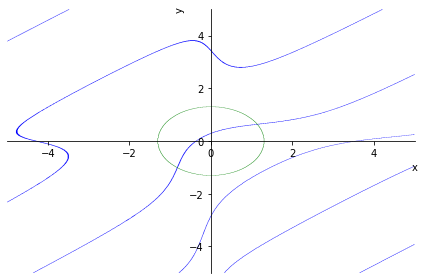

In [3]:
plot = sp.plot_implicit(sp.Eq(f, 0), show=False, line_color='blue')
plot.extend(sp.plot_implicit(sp.Eq(g, 0), show=False, line_color='green'))
plot.show()

In [4]:
def newton_system(x, y, f, g, x0, y0):
    dfdx = f.diff(x)
    dfdy = f.diff(y)
    dgdx = g.diff(x)
    dgdy = g.diff(y)
    
    d = dfdx * dgdy - dgdx * dfdy
    dx = f * dgdy - g * dfdy
    dy = dfdx * g - dgdx * f

    xs, ys, norms, fs, gs = [], [], [], [], []
    xk, yk = x0, y0
    while True:    
        new_x = xk - (dx / d).evalf(subs={x: xk, y: yk})
        new_y = yk - (dy / d).evalf(subs={x: xk, y: yk})
        xs.append(new_x)
        ys.append(new_y)

        norm = sp.sqrt((new_x - xk) ** 2 + (new_y - yk) ** 2)
        norms.append(norm)
        fs.append(f.evalf(subs={x: new_x, y: new_y}))
        gs.append(g.evalf(subs={x: new_x, y: new_y}))

        xk, yk = new_x, new_y

        if norm < 1e-5 and len(xs) > 1:
            break
    return pd.DataFrame(list(zip(xs, ys, norms, fs, gs)), columns=['x', 'y', 'norm', 'f', 'g'])

In [5]:
newton_system(x, y, f, g, 1, 1)

,x,y,norm,f,g
0,1.22761708889715,0.622382911102848,0.440912922225209,-0.0648343503263468,0.194404204985173
1,1.14149633521898,0.636074171385597,0.0872022638595296,-0.00358082004103558,0.00760423482222702
2,1.13755666993897,0.637166805074043,0.00408837509233626,-8.94822418305518e-6,1.67148108958352e-5
3,1.13754769473498,0.637169712315441,9.43431710133745e-6,-5.15817799583199e-11,8.90062924372405e-11


In [6]:
newton_system(x, y, f, g, -1, -1)

,x,y,norm,f,g
0,-0.822059767940987,-1.02794023205901,0.180120467334300,-0.0121769613176794,0.0324433827527268
1,-0.824116762561558,-1.01051444859597,0.0175467705339115,-0.000187332632752991,0.000307889156169836
2,-0.824171430058251,-1.01031752219007,0.000204373541676120,-3.26758676647519e-8,4.17685447475136e-8
3,-0.824171440931074,-1.01031749264951,3.14779734395557e-8,-7.59514473637850e-16,8.46188933633038e-16
